**Importing the Libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

**Loading the Dataset**

In [59]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Summary & Data Preprocessing**

In [60]:
print('\033[1m' + "Size of the actual data:" + '\033[0m', churn_data.shape)
print("\n")
print('\033[1m' + "Column Names and Data Types:" + '\033[0m')
print("\n")
print(churn_data.dtypes)

Size of the actual data: (7043, 21)


Column Names and Data Types:


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [61]:
print('\033[1m' + "Descriptive Statistics:" + '\033[0m')
churn_data.describe()

Descriptive Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Senior Citizen will be considered a categorical variable.**

**The tenure stats show that 75% of the customers have a tenure less than 55 months.**

**Average monthly charges amounts to roughly USD 65 and 25% of the customers roughly pay more than USD 90**

Distribution of the Target Variable




([<matplotlib.patches.Wedge at 0x7f4cbf16cd90>,
 [Text(-0.8144539368428058, -0.7393678277834755, 'Not Churned'),
  Text(0.8144540060674139, 0.7393677515287918, 'Churned')],
 [Text(-0.44424760191425766, -0.40329154242735027, '73.463'),
  Text(0.4442476396731348, 0.4032915008338864, '26.537')])

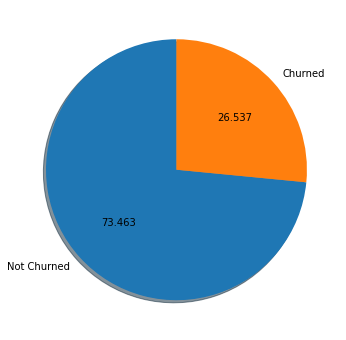

In [62]:
print('\033[1m' + "Distribution of the Target Variable" + '\033[0m')
print("\n")
plt.figure(figsize=(6,6))
plt.pie(churn_data["Churn"].value_counts(), startangle=90,autopct='%.3f',labels=['Not Churned','Churned'],shadow=True)

In [63]:
churn_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [64]:
100*churn_data['Churn'].value_counts()/len(churn_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**The target variable is highly imbalanced with 73% of the data indicating "No Churn" and only 26% of the data indicating "Churn"**

In [65]:
print('\033[1m' + "Summary of the Dataframe Columns" + '\033[0m')
print("\n")
churn_data.info()

Summary of the Dataframe Columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperle

Plotting the missing values


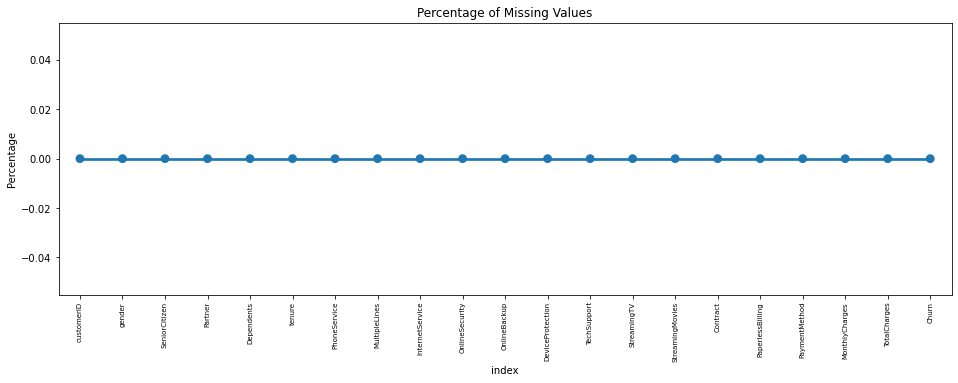

In [66]:
print('\033[1m' + "Plotting the missing values" + '\033[0m')
missing_values = pd.DataFrame((churn_data.isnull().sum())*100/churn_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing_values)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

In [67]:
print('\033[1m' + "Converting TotalCharges variable to numeric data" + '\033[0m')
churn_data_1 = churn_data.copy()
churn_data_1.TotalCharges = pd.to_numeric(churn_data_1.TotalCharges, errors = 'coerce')
churn_data_1.isnull().sum()

Converting TotalCharges variable to numeric data


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [68]:
churn_data_1.loc[churn_data_1['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Missing Values : All those customers who have tenure = 0 do not have any total charges. Removing the missing values as the percentage is very small**

In [69]:
print('\033[1m' + "Removing Missing Values" + '\033[0m')
churn_data_1.dropna(how = 'any', inplace=True)
churn_data_1.isnull().sum()

Removing Missing Values


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
churn_data_1.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [71]:
churn_data_1['PaymentMethod'] = churn_data_1['PaymentMethod'].str.replace('(automatic)','', regex=False)
churn_data_1.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

**Variation of the Features in the Dataset**

In [72]:
column_numerical = ['tenure','MonthlyCharges','TotalCharges']
variation_numerical = dict()

for col in column_numerical:
  tmp = f'{churn_data_1[col].min()} - {churn_data_1[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
print('\033[1m' + "Numerical Column Variation" + '\033[0m')
print("\n")
data_variation_numerical

Numerical Column Variation




,tenure,MonthlyCharges,TotalCharges
data variation,1 - 72,18.25 - 118.75,18.8 - 8684.8


In [73]:
column_categorical = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
variation_categorical = dict()

for col in column_categorical:
  tmp = churn_data_1[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
print('\033[1m' + "Categorical Column Variation" + '\033[0m')
print("\n")
data_variation_categorical

Categorical Column Variation




,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer , Credit card , Electronic check...","No, Yes"


In [74]:
churn_data_1.drop(columns = ['customerID'], axis=1, inplace=True)
churn_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(churn_data_1.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
SeniorCitizen,-,"0, 1"
Partner,-,"No, Yes"
Dependents,-,"No, Yes"
tenure,1 - 72,-
PhoneService,-,"No, Yes"
MultipleLines,-,"No, No phone service, Yes"
InternetService,-,"DSL, Fiber optic, No"
OnlineSecurity,-,"No, No internet service, Yes"
OnlineBackup,-,"No, No internet service, Yes"


**Churn Probability for each variable**

In [76]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(churn_data_1.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

# only contains input features
column_categorical.remove('Churn')

data_viz = churn_data_1.copy()
data_viz.loc[:,'Churn'] = data_viz.loc[:, 'Churn'].apply(lambda x: 'Churn' if x == 'Yes' else 'retain')

In [77]:
import inflection

def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

In [78]:
columns = data_viz['Churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Churn', ascending=False).reset_index(drop=True)
print('\033[1m' + "Churn / Retain Probability of Each Attribute" + '\033[0m')
print("\n")
attr_crosstab.style.background_gradient()

Churn / Retain Probability of Each Attribute




,attribute,Churn,retain
0,Payment Method (Electronic check),0.452854,0.547146
1,Contract (Month-to-month),0.427097,0.572903
2,Internet Service (Fiber optic),0.418928,0.581072
3,Online Security (No),0.417787,0.582213
4,Senior Citizen (1),0.416813,0.583187
5,Tech Support (No),0.416475,0.583525
6,Online Backup (No),0.399417,0.600583
7,Device Protection (No),0.391403,0.608597
8,Streaming Movies (No),0.337289,0.662711
9,Paperless Billing (Yes),0.335893,0.664107


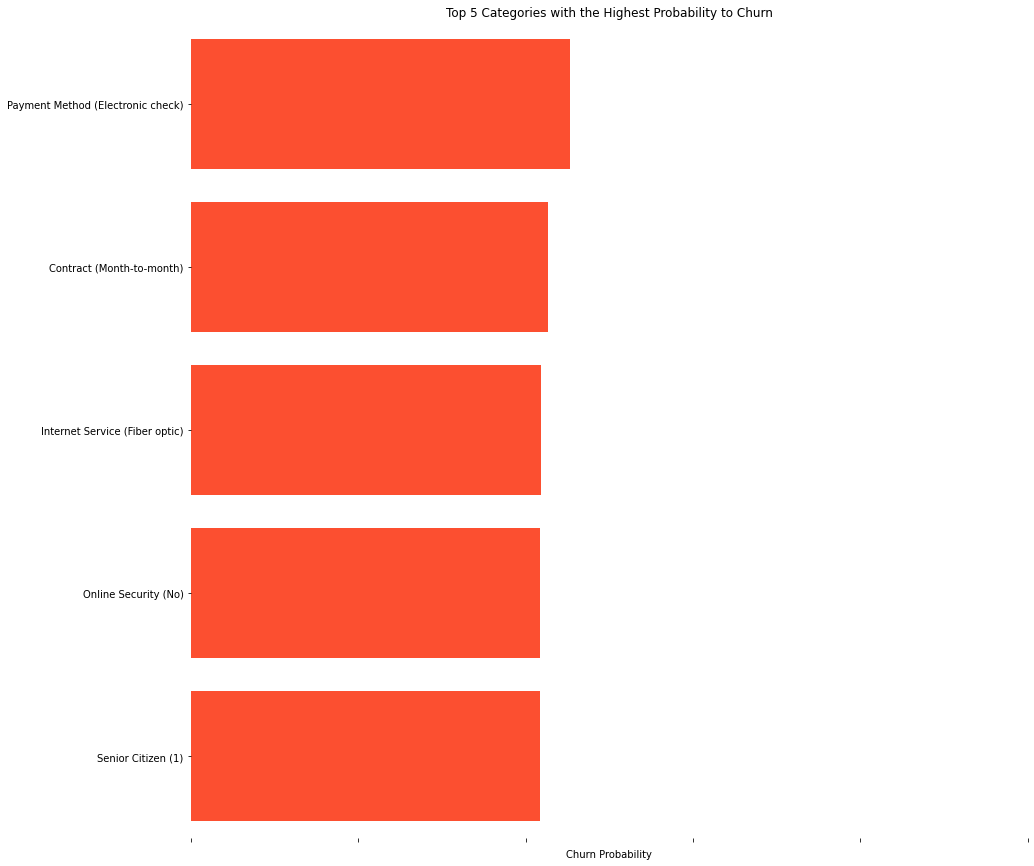

In [79]:
fig, ax = plt.subplots(figsize=(15,15))

sns.barplot(data=attr_crosstab.iloc[:5], x='Churn', y='attribute', ax=ax, palette=['#FC4F30'], saturation=1)

#ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()


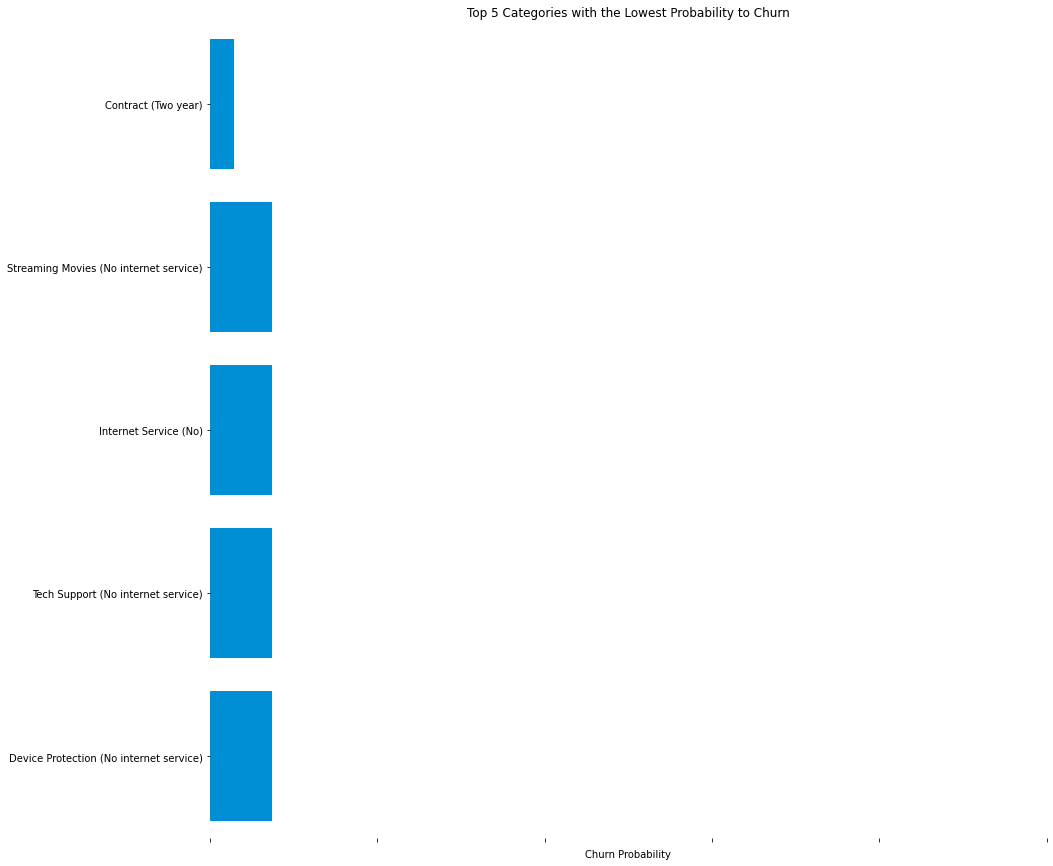

In [80]:
fig, ax = plt.subplots(figsize=(15,15))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('Churn'), x='Churn', y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

#ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

**Convert Target variable into 0/1**

In [81]:
churn_data_1['Churn'] = np.where(churn_data_1.Churn == 'Yes', 1,0)
churn_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**Creating Dummy Variables**

In [82]:
churn_data1_dummies = pd.get_dummies(churn_data_1)
churn_data1_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**Monthly & Total Charges vs Churn**

Text(0.5, 1.0, 'Monthly Charges by Churn')

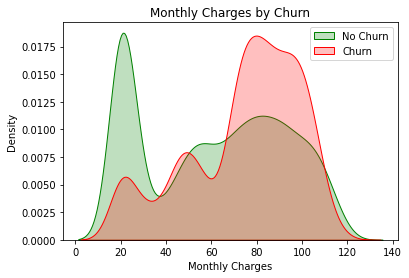

In [83]:
plt_1 = sns.kdeplot(churn_data1_dummies.MonthlyCharges[(churn_data1_dummies["Churn"]==0)], color="green", shade=True)
plt_1 = sns.kdeplot(churn_data1_dummies.MonthlyCharges[(churn_data1_dummies["Churn"]==1)], ax=plt_1, color="red", shade=True)
plt_1.legend(["No Churn", "Churn"], loc="upper right")
plt_1.set_ylabel("Density")
plt_1.set_xlabel("Monthly Charges")
plt_1.set_title("Monthly Charges by Churn")

Text(0.5, 1.0, 'Total Charges by Churn')

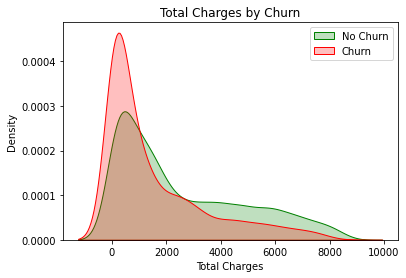

In [84]:
plt_2 = sns.kdeplot(churn_data1_dummies.TotalCharges[(churn_data1_dummies["Churn"]==0)], color="green", shade=True)
plt_2 = sns.kdeplot(churn_data1_dummies.TotalCharges[(churn_data1_dummies["Churn"]==1)], ax=plt_2, color="red", shade=True)
plt_2.legend(["No Churn", "Churn"], loc="upper right")
plt_2.set_ylabel("Density")
plt_2.set_xlabel("Total Charges")
plt_2.set_title("Total Charges by Churn")

**Correlation between features and target variables**

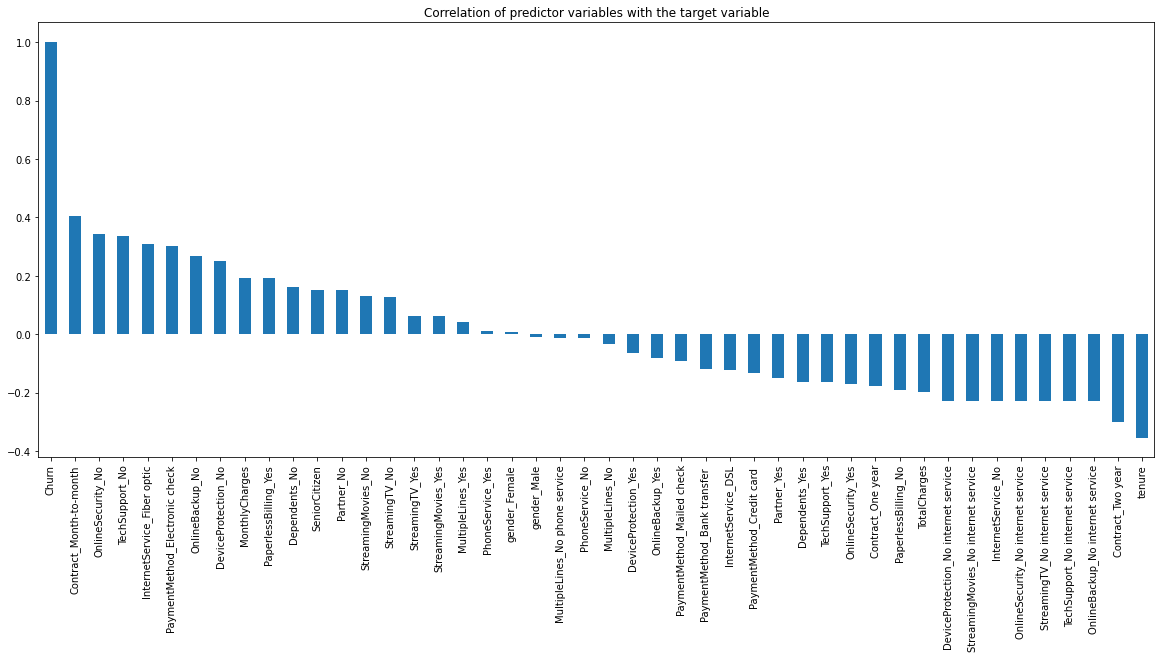

In [85]:
plt.figure(figsize=(20,8))
plt.title("Correlation of predictor variables with the target variable")
churn_data1_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind='bar')

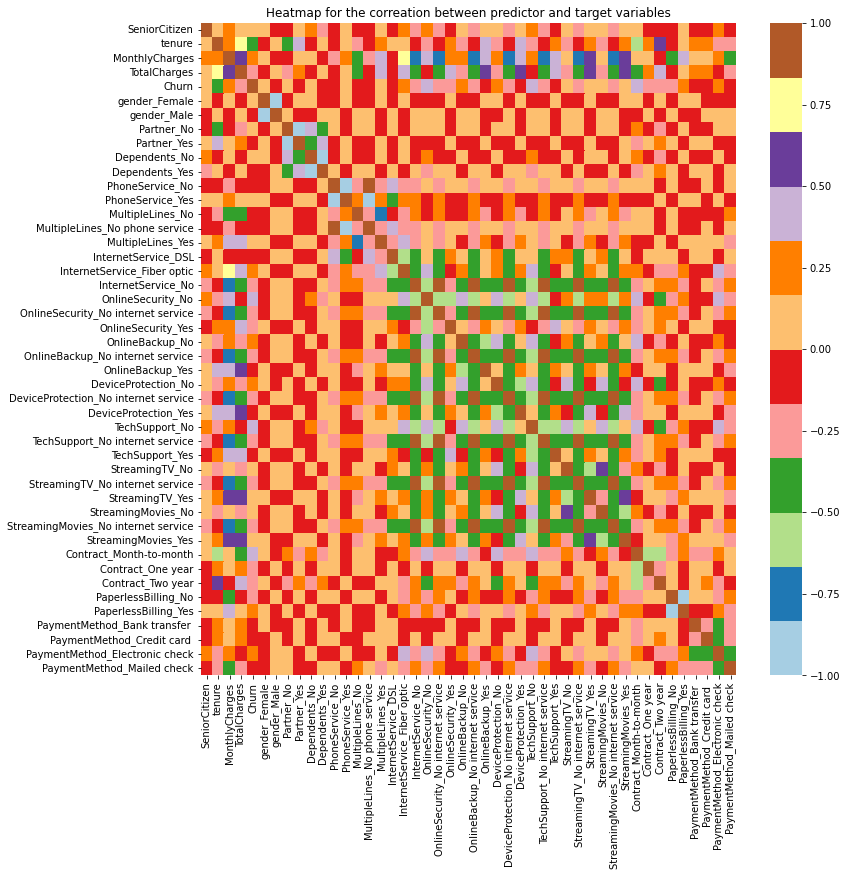

In [86]:
plt.figure(figsize=(12,12))
plt.title("Heatmap for the correation between predictor and target variables")
sns.heatmap(churn_data1_dummies.corr(), cmap="Paired")

**Tenure Vs Churn Rate**




In [87]:
print("Max Tenure:",churn_data_1['tenure'].max())

churn_data_2 = churn_data_1.copy()
labels = ["{0} - {1}". format(i,i+11) for i in range(1, 72, 12)]
churn_data_2['TenureBins'] = pd.cut(churn_data_1.tenure, range(1,80,12), right=False, labels=labels)
print("\n")
print('\033[1m' + "Tenure Ranges:" + '\033[0m')
churn_data_2['TenureBins'].value_counts()

Max Tenure: 72


Tenure Ranges:


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: TenureBins, dtype: int64

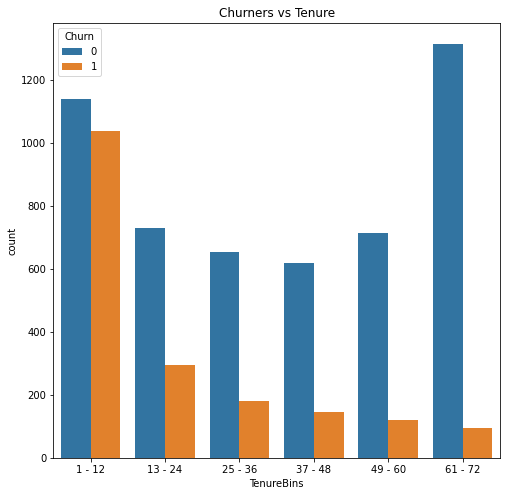

In [95]:
plt.figure(figsize=(8,8))
sns.countplot(data=churn_data_2, x="TenureBins", hue='Churn')
plt.title("Churners vs Tenure")
plt.show()

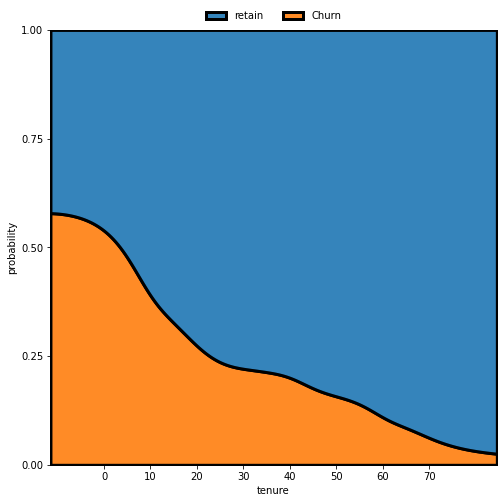

In [94]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='Churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['tenure'].max(),10))
ax.set_xlim(data_viz['tenure'].min(),data_viz['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

ax.axis('tight')
plt.show()

In [106]:
churn_copy = churn_data_1.drop(columns=['TotalCharges','MonthlyCharges','tenure'])
features = churn_copy.columns.to_list()
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [107]:
list(enumerate(features))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'DeviceProtection'),
 (10, 'TechSupport'),
 (11, 'StreamingTV'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod'),
 (16, 'Churn')]

**Univariate Analysis**

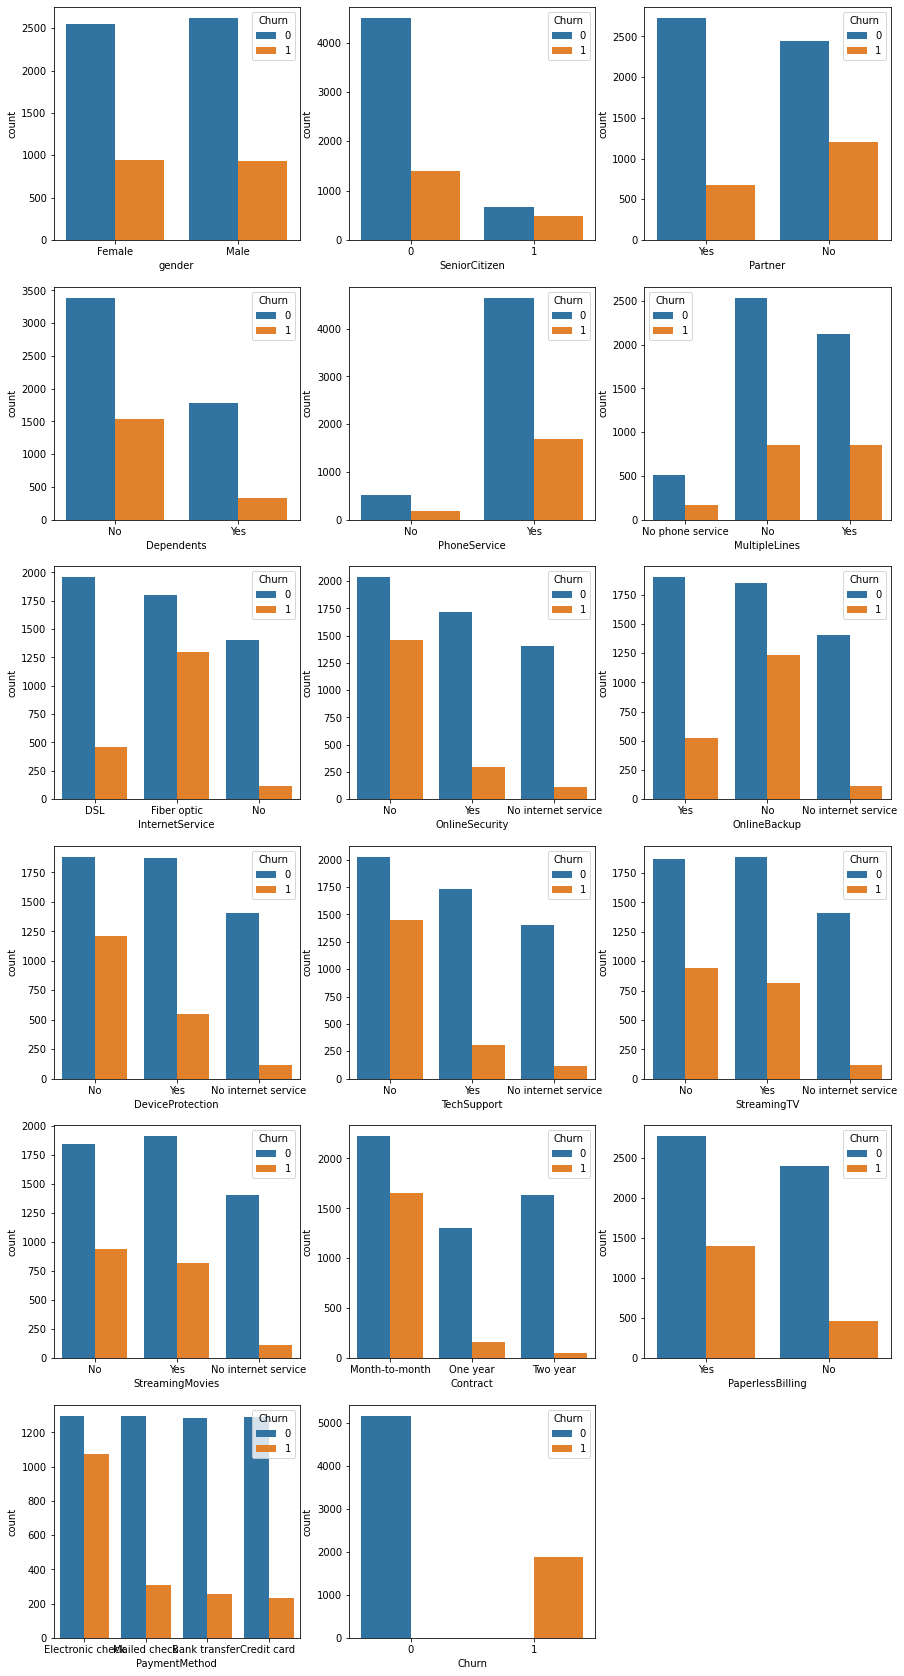

In [108]:
plt.figure(figsize = (15,30))
for i in enumerate(features):
  plt.subplot(6,3, i[0]+1)
  sns.countplot(i[1], hue="Churn", data =churn_copy)
  plt.xticks()
